# **<span style="font-family: 'Palatino Linotype', serif;">🧠🖼️🧪E se meus dados forem imagens? </span>**
----
*<span style="font-family: 'Angilla Tattoo'"> "Nos confins do universo digital, onde dados se tornam imagens e imagens se tornam almas, Maga Patolina e Maga Butterfly traçam os caminhos entre o código e o caos, desvendando o poder oculto nas transformações infinitas do saber." 🦆🦋💻🌌 </span>*



<div align="center">
    <img src = "Patolina e Borboleta.png" alt = "Magas pop" width = 350>
</div>

----
 **Objetivo:** Nesse notebook, iremos implementar uma rede neural convolucional (CNN) utilizando PyTorch e treiná-la com o banco de imagens MNIST.

 ----

### ❓ O que é a CNN?

A CNN é uma rede neural utilizada para analisar imagens, através do processamento de imagens para identificar objetos, é um algoritmo de aprendizado profundo que recebe imagens e atribui importância (pesos e viés) para seus pixels e diferenciar um do outro. 


<div align="center">
    <img src = "Resumo CNN.png" alt = "CNN" width = 450>
</div>

Alguns conceitos importantes para entender a rede:
 
1 - Campos receptivos locais: pequena janela de pixels de entrada (cada informação dessa terá pesos e um viés atribuído), que desliza por toda a imagem de entrada (como um kernel) e a cada deslocamento, os dados dos pixels serão direcionados à um neurônio diferente. A quantidade de pixels que ele anda por vez pode ser definida como um dos dados de entrada da CNN (é preciso realizar testes para saber a melhor quantidade de pixels paro o campo receptivo local).
 
2 - Pesos compartilhados: para todos os neurônios da camada oculta, serão utilizados os mesmos valores de pesos e viés (diferente do que ocorre na MLP), isso define um kernel ou filtro. Para realizar o reconhecimento de uma imagem, serão utilizados diversos mapas de recursos, tornando o processo de seleção de parâmetros muito menor e facilitando o processo de  reconhecimento de imagens.
 
3 - Pooling: são as camadas de agrupamento. Recebe as saídas do processo de convolução e realiza um agrupamento, isso deve ser aplicado em todos os mapas de recurso da função. Com isso, não é necessário saber a posição exata de um recurso em uma imagem, e sim sua posição em relação aos demais recursos.
 
   Durante o funcionamento da rede começamos com uma matriz de entrada, em seguida, uma camada convolucional com diferentes mapas de recursos usa os campos receptivos locais, pesos e viéses fixos. O resultado disso será uma camada de neurônios ocultos que serão agrupados.
   A camada convolutiva recebe: os dados de entrada, o filtro e um mapa de características. Sendo que, o filtro é uma matriz 3x3 que se move por uma imagem e realiza a multiplicação dos pixels de entrada e armazena seus valores em uma matriz com a saída dos resultados. Esse resultado é chamado de mapa de características, pois o filtro pode ser usado para determinar bordas, realçar detalhes, diminuir ruído, ou seja, delimita os componentes da imagem. Para transformar a imagem em uma série de valores númericos que podem ser processados pelo computador, um valor de transformação linear retificada dará a lineralidade a esse mapa de características.
   Com a imagem sendo uma série de valores, agora teremos uma camada de agregação, a qual é composta por um filtro que agrega os valores de maior importância do mapa de características, isso é feito visando diminuir a complexidade dos dados e tornar menos custoso computacionalmente. Diferentes filtros podem ser aplicados e gerar diferentes mapas de características, até obter uma boa classificação da imagem. Por fim, para classificar os dados de entrada, será utilizada a função de ativação SoftMax que com uma camada totalmente ligada realiza a classificação de características extraídas de camadas anteriores.



In [52]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import torch
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm


In [53]:
# Essa função irá tranformar os dados em tensores e normalizá-los
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [54]:
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform
)


In [55]:
class  CNN (nn.Module): 
    def  __init__ (self, num_dados_entrada, num_classes= 10 ): 
        """ 
        Define as camadas da rede neural convolucional. 

        Parâmetros: 
            num_dados_entrada: int 
                O número de canais na imagem de entrada. Para MNIST, é 1 (imagens em tons de cinza). 
            num_classes: int 
                O número de classes que queremos prever, no nosso caso 10 (dígitos de 0 a 9). 
        """ 
        super (CNN, self).__init__() 
        
        #convolução de matriz quadrada
        # padding (preenchimento): adição de pixels ao redor da borda de entrada
        # 8 canis de saída
        self.conv1 = nn.Conv2d(in_channels=num_dados_entrada, out_channels= 8 , kernel_size= 3 , stride = 1 , padding= 1)
        
        #pega a informação de maior relevância para fazer a previsão
        self.pool = nn.MaxPool2d(kernel_size= 2 , stride = 2) 
        
        #8 canais de entrada, 16 de saída
        #mais convoluções para ficar melhor
        self.conv2 = nn.Conv2d(in_channels = 8 , out_channels= 16 , kernel_size= 3 , stride= 1 , padding= 1 ) 
        
        #camada totalmente conectada: todos os neurônios de entrada estão conectados a todos os neurônios de saída
        #recursos de entrada e de saída
        #faz a previsão
        self.fc1 = nn.Linear( 16 * 7 * 7 , num_classes) 
        #quantidade de dados que entra após passar pelas 2 convoluções
        
    def  forward (self, x): 
        """ 
        Define a passagem para frente da rede neural. 

        Parâmetros: 
            x: torch.Tensor 
                O tensor de entrada. 

        Retorna: 
            torch.Tensor 
                O tensor de saída após passar pela rede. 
        """
        x = F.relu(self.conv1(x))   # Aplicar a primeira convolução e ativação ReLU
        x = self.pool(x)            # Aplicar o agrupamento máximo
        x = F.relu(self.conv2(x))   # Aplicar a segunda convolução e ativação ReLU
        x = self.pool(x)            # Aplicar o agrupamento máximo
        x = x.reshape(x.shape[ 0 ], - 1 ) # Achatar o tensor
        x = self.fc1(x)             # Aplicar a camada totalmente conectada 
        return x

In [56]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [57]:
#hiperparâmetros

# input_size = 784  
num_classes = 10  # digits 0-9
taxa_de_aprendizado = 0.001
batch_size = 64
num_epochs = 10 


In [58]:
train_dataset = datasets.FashionMNIST(root="dataset/", download=True, train=True, transform=transforms.ToTensor())
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.FashionMNIST(root="dataset/", download=True, train=False, transform=transforms.ToTensor())
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [59]:
modelo = CNN(num_dados_entrada=1, num_classes=num_classes).to(device)

In [60]:
criterio = nn.CrossEntropyLoss()
otimizador = optim.Adam(modelo.parameters(), lr=taxa_de_aprendizado)

In [61]:
for epoch in range(num_epochs):
    print(f"Epoch [{epoch + 1}/{num_epochs}]")
    for batch_index, (data, targets) in enumerate(tqdm(train_loader)):
        # Move data and targets to the device (GPU/CPU)
        data = data.to(device)
        targets = targets.to(device)

        # Forward pass: calcula a saida do modelo
        scores = modelo(data)
        loss = criterio(scores, targets)

        # Backward pass: calcula o gradiente
        otimizador.zero_grad()
        loss.backward()

        # atualiza os parâmetros do modelo
        otimizador.step()

Epoch [1/10]


100%|██████████| 938/938 [00:17<00:00, 52.84it/s]


Epoch [2/10]


100%|██████████| 938/938 [00:14<00:00, 65.73it/s]


Epoch [3/10]


100%|██████████| 938/938 [00:15<00:00, 61.37it/s]


Epoch [4/10]


100%|██████████| 938/938 [00:22<00:00, 40.94it/s]


Epoch [5/10]


100%|██████████| 938/938 [00:18<00:00, 50.49it/s]


Epoch [6/10]


100%|██████████| 938/938 [00:18<00:00, 51.82it/s]


Epoch [7/10]


100%|██████████| 938/938 [00:18<00:00, 51.26it/s]


Epoch [8/10]


100%|██████████| 938/938 [00:43<00:00, 21.72it/s]


Epoch [9/10]


100%|██████████| 938/938 [00:19<00:00, 47.38it/s]


Epoch [10/10]


100%|██████████| 938/938 [00:28<00:00, 32.61it/s]


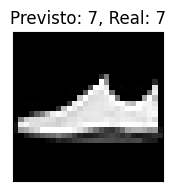

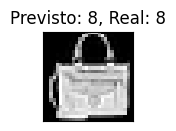

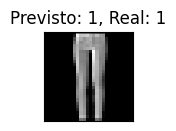

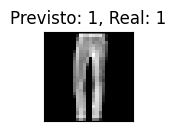

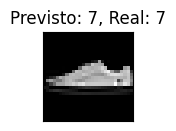

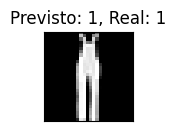

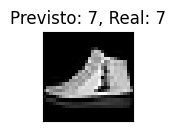

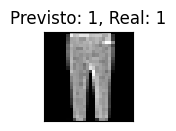

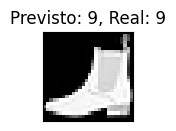

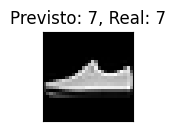

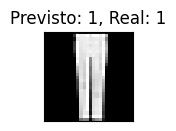

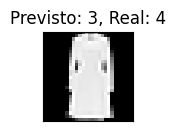

In [62]:
import matplotlib.pyplot as plt
modelo.eval()  # Coloca o modelo em modo de avaliaçãowith torch.no_grad():     
exemplos = next(iter(test_loader))    
imagens, etiquetas = exemplos[0].to(device), exemplos[1].to(device)              
saidas = modelo(imagens)   
_, predicoes = torch.max(saidas, 1)    
fig = plt.figure(figsize=(10, 4))     
for i in range(12): 
    plt.subplot(2, 6, i + 1)                           
    plt.imshow(imagens[i].cpu().numpy().squeeze(), cmap='gray') 
    plt.title(f'Previsto: {predicoes[i]}, Real: {etiquetas[i]}') 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.tight_layout()
    plt.show()

In [63]:
def  check_accuracy ( loader, modelo ): 
    """ 
    Verifica a precisão do modelo no carregador de conjunto de dados fornecido. 

    Parâmetros: 
        loader: DataLoader 
            O DataLoader para o conjunto de dados para verificar a precisão. 
        modelo: nn.Module 
            O modelo de rede neural. 
    """ 
    if loader.dataset.train: 
        print ( "Verificando a precisão nos dados de treinamento" ) 
    else : 
        print ( "Verificando a precisão nos dados de teste" ) 

    num_correct = 0
    num_samples = 0
    modelo. eval ()   # Define o modelo para o modo de avaliação 

    with torch.no_grad():   # Desabilita o cálculo de gradiente 
        for x, y in loader: 
            x = x.to(device) 
            y = y.to(device) 

            # Passagem para frente: calcula a saída do modelo
            scores = modelo(x) 
            _, predictions = scores. max ( 1 )   # Obtém o índice da probabilidade máxima de logaritmo
            num_correct +=(predictions == y). sum ()   # Contar previsões corretas
            num_samples += predictions.size( 0 )   # Contar amostras totais 

        # Calcular precisão
        accuracy = float (num_correct) / float (num_samples) * 100 
        print ( f"Obteve {num_correct} / {num_samples} com precisão {accuracy} %" ) 
    
    modelo.train()   # Retornar o modelo ao modo de treinamento 

# Verificação final de precisão nos conjuntos de treinamento e teste
check_accuracy(train_loader, modelo) 
check_accuracy(test_loader, modelo)

Verificando a precisão nos dados de treinamento
Obteve 54523 / 60000 com precisão 90.87166666666666 %
Verificando a precisão nos dados de teste
Obteve 8894 / 10000 com precisão 88.94 %


-----

### 📊 Conclusão:

Nesse notebook, exploramos uma rede neural do tipo CNN , a qual é uma útil para pevisão e classificação de imagens. Isso é importante pois consegue processar dados com estrutura de grade, ou seja, com pixels, como imagens. Por fim, também tivemos a oportunidade de aprender sobre aplicações para essa, tais como: sistemas de recomendação, reconhecimento facial, detecção de objetos entre demais utilidades.

4.6 - Contribuição de cada membro: pesquisas para o entendimendo da rede neural CNN e a aplicação do código foram feitas em conjunto. Cabe ressaltar também que a aluna Giovana já havia apresentado um Lumi Talk sobre CNN, então também contribuiu com estudos prévios sobre o tema.

----
### 📚 Referências:

1. DSA, Equipe. Capítulo 40 - Introdução às Redes Neurais Convolucionais». Deep Learning Book, 8 de dezembro de 2022, <https://www.deeplearningbook.com.br/introducao-as-redes-neurais-convolucionais/>.
Alves, Gisely. 

2. Entendendo Redes Convolucionais (CNNs). Neuronio BR, 12 de dezembro de 2018, <https://medium.com/neuronio-br/entendendo-redes-convolucionais-cnns-d10359f21184>.

3. Introduction to Convolution Neural Network. GeeksforGeeks, 21 de agosto de 2017, <https://www.geeksforgeeks.org/introduction-convolution-neural-network/>.

4. Introdução aos Autoencoders. Deep Learning Book. Disponível em: <https://www.deeplearningbook.com.br/introducao-aos-autoencoders/>. Acesso em: 27 abr. 2025.

5. KANARIES. Python - nn-linear. Disponível em: <https://docs.kanaries.net/pt/topics/Python/nn-linear>. Acesso em: 27 abr. 2025.

6. OPENAI. ChatGPT. 2025. Disponível em: <https://chatgpt.com/share/680e91ad-4c34-8005-906c-2a282c25852b>. Acesso em: 27 abr. 2025.